


# **Q_4 Report, Ali Afshar Degarsi**




Setup and Imports:

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

print("Libraries imported successfully!")

Libraries imported successfully!


# Part one - Load dataset and show some instances

In [2]:
# Load the MNIST dataset
# as_frame=False returns the data as a NumPy array not DataFrame.
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Separate the data (images) and the target (labels)
X, y = mnist.data, mnist.target

print(f"Shape of the data (X): {X.shape}")
print(f"Shape of the target (y): {y.shape}")
print(f"Type of data: {type(X[0,0])}")
print(f"Type of target labels: {type(y[0])}")

Shape of the data (X): (70000, 784)
Shape of the target (y): (70000,)
Type of data: <class 'numpy.int64'>
Type of target labels: <class 'str'>


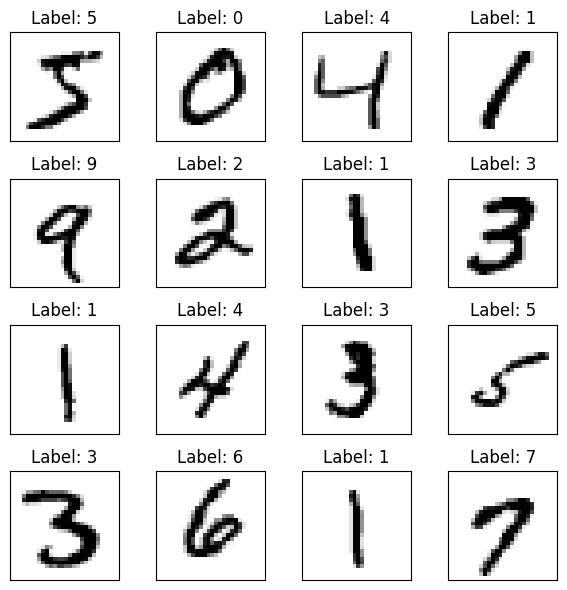

In [3]:
# Function to plot a grid of images
def plot_digits(images, labels, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 1.5, rows * 1.5))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            # Reshape the flat image array into a 28x28 matrix
            ax.imshow(images[i].reshape(28, 28), cmap='binary')
            ax.set_title(f"Label: {labels[i]}")
        ax.set_xticks([])
        ax.set_yticks([])
    plt.tight_layout()
    plt.show()

# Display the first 16 images and their labels
plot_digits(X, y, 4, 4)

normalize data:

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# X = X//255.0
# print(X.max())

# Part two - apply hard-margine SVM for 3 and 4 numbers then report error

filter data:

In [5]:
# Create a boolean mask to select only the rows where the label is '3' or '4'
# Note: The labels from fetch_openml are strings, so we compare to '3' and '4'
mask = (y == '3') | (y == '4')

# Apply the mask to our data and labels
X_bin = X[mask][:1500]
y_bin = y[mask][:1500]
# X_bin = X[mask]
# y_bin = y[mask]

print(f"Shape of binary data (3s and 4s only): {X_bin.shape}")
print(f"Number of '3's: {np.sum(y_bin == '3')}")
print(f"Number of '4's: {np.sum(y_bin == '4')}")

Shape of binary data (3s and 4s only): (1500, 784)
Number of '3's: 750
Number of '4's: 750


splitting data:



> i tried without stratify splitting, and i got same results( for diffrent hyperparameters ), so i let it to be on.



In [6]:
# Split the binary dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_bin, y_bin, test_size=0.2, random_state=7,
    stratify=y_bin
)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (1200, 784)
Testing data shape: (300, 784)


Initialize and train the SVM classifier:

In [7]:
# kernel='linear' because we are looking for a straight-line (hyperplane) separator.
# C=1e10 is a very large value, which approximates a hard margin SVM.
hard_margin_svm = SVC(kernel='linear', C=1e10)

print("Training the Hard Margin SVM... This may take a moment.")
# Train the model on the training data
hard_margin_svm.fit(X_train, y_train)
print("Training complete!")

Training the Hard Margin SVM... This may take a moment.
Training complete!


report evaluation metrics:

In [8]:
# Evaluation on Training Data
y_train_pred = hard_margin_svm.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error = (1 - train_accuracy) * 100

# Evaluation on Testing Data
y_test_pred = hard_margin_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error = (1 - test_accuracy) * 100

# Report the results
print("--- Model Performance Report ---")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Training Error Percentage: {train_error:.4f}%")
print("-" * 30)
print(f"Testing Accuracy:  {test_accuracy:.4f}")
print(f"Testing Error Percentage:  {test_error:.4f}%")
print("-" * 30)

--- Model Performance Report ---
Training Accuracy: 1.0000
Training Error Percentage: 0.0000%
------------------------------
Testing Accuracy:  0.9933
Testing Error Percentage:  0.6667%
------------------------------


# Part three - apply soft-margin SVM with C=0.1

In [9]:
soft_margin_svm_c01 = SVC(kernel='linear', C=0.1)

print("Training the Soft Margin SVM (C=0.1)...")
# Train the model on the training data
soft_margin_svm_c01.fit(X_train, y_train)
print("Training complete!")

# Evaluation on Training Data
y_train_pred_c01 = soft_margin_svm_c01.predict(X_train)
train_accuracy_c01 = accuracy_score(y_train, y_train_pred_c01)
train_error_c01 = (1 - train_accuracy_c01) * 100

# Evaluation on Testing Data
y_test_pred_c01 = soft_margin_svm_c01.predict(X_test)
test_accuracy_c01 = accuracy_score(y_test, y_test_pred_c01)
test_error_c01 = (1 - test_accuracy_c01) * 100

# Report the results
print("\n--- Soft Margin SVM (C=0.1) Performance ---")
print(f"Training Accuracy: {train_accuracy_c01:.4f}")
print(f"Training Error Percentage: {train_error_c01:.4f}%")
print("-" * 30)
print(f"Testing Accuracy:  {test_accuracy_c01:.4f}")
print(f"Testing Error Percentage:  {test_error_c01:.4f}%")
print("-" * 30)

Training the Soft Margin SVM (C=0.1)...
Training complete!

--- Soft Margin SVM (C=0.1) Performance ---
Training Accuracy: 1.0000
Training Error Percentage: 0.0000%
------------------------------
Testing Accuracy:  0.9933
Testing Error Percentage:  0.6667%
------------------------------


# Part four - find best C for soft-margin SVM

In [10]:
# Import GridSearchCV for cross-validation
from sklearn.model_selection import GridSearchCV

# Soft Margin SVM with Cross-Validation

# Define a range of C values to test
# We use a logarithmic scale to explore a wide range of magnitudes
param_grid = {'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10]}

# Create a base SVM classifier
svc = SVC(kernel='linear')

# Set up GridSearchCV
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores to speed up the process
# verbose=2 shows progress updates
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5,
                           scoring='accuracy', n_jobs=-1, verbose=2)

print("Starting 5-fold cross-validation to find the best C...")
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
print("Cross-validation complete!")

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

print(f"\nBest parameters found: {best_params}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Evaluation on Training Data (using the best model)
y_train_pred_cv = best_svm.predict(X_train)
train_accuracy_cv = accuracy_score(y_train, y_train_pred_cv)
train_error_cv = (1 - train_accuracy_cv) * 100

# Evaluation on Testing Data (using the best model)
y_test_pred_cv = best_svm.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_test_pred_cv)
test_error_cv = (1 - test_accuracy_cv) * 100

# Report the results
print("\n--- Soft Margin SVM (Optimal C via CV) Performance ---")
print(f"Training Accuracy: {train_accuracy_cv:.4f}")
print(f"Training Error Percentage: {train_error_cv:.4f}%")
print("-" * 30)
print(f"Testing Accuracy:  {test_accuracy_cv:.4f}")
print(f"Testing Error Percentage:  {test_error_cv:.4f}%")
print("-" * 30)

Starting 5-fold cross-validation to find the best C...
Fitting 5 folds for each of 7 candidates, totalling 35 fits
Cross-validation complete!

Best parameters found: {'C': 0.01}
Best cross-validation accuracy: 0.9917

--- Soft Margin SVM (Optimal C via CV) Performance ---
Training Accuracy: 0.9983
Training Error Percentage: 0.1667%
------------------------------
Testing Accuracy:  0.9967
Testing Error Percentage:  0.3333%
------------------------------


In [11]:
print("="*50)
print("      FINAL COMPARISON OF MODELS")
print("="*50)

# Hard Margin Results
print("\n--- Hard Margin SVM (C ~ 1e10) ---")
print(f"Training Error: {train_error:.4f}%")
print(f"Testing Error:  {test_error:.4f}%")

# Soft Margin C=0.1 Results
print("\n--- Soft Margin SVM (C = 0.1) ---")
print(f"Training Error: {train_error_c01:.4f}%")
print(f"Testing Error:  {test_error_c01:.4f}%")

# Soft Margin CV Results
print(f"\n--- Soft Margin SVM (Optimal C = {best_params['C']}) ---")
print(f"Training Error: {train_error_cv:.4f}%")
print(f"Testing Error:  {test_error_cv:.4f}%")

print("\n" + "="*50)

      FINAL COMPARISON OF MODELS

--- Hard Margin SVM (C ~ 1e10) ---
Training Error: 0.0000%
Testing Error:  0.6667%

--- Soft Margin SVM (C = 0.1) ---
Training Error: 0.0000%
Testing Error:  0.6667%

--- Soft Margin SVM (Optimal C = 0.01) ---
Training Error: 0.1667%
Testing Error:  0.3333%



# Part five - apply SVM with gussian kernel and find optimal parameter for it

In [12]:
# SVM with Gaussian (RBF) Kernel and Cross-Validation

# Define the grid of parameters to search over
# We search for the best combination of C and gamma
param_grid_rbf = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [1e-5, 1e-4, 1e-3, 1e-2]
}

# Create a base SVM classifier with the RBF kernel
rbf_svc = SVC(kernel='rbf')

# Set up GridSearchCV
# cv=5 means 5-fold cross-validation
# n_jobs=-1 uses all available CPU cores to speed up the process
# verbose=2 shows progress updates
grid_search_rbf = GridSearchCV(estimator=rbf_svc, param_grid=param_grid_rbf, cv=5,
                               scoring='accuracy', n_jobs=-1, verbose=2)

print("Starting 5-fold cross-validation for RBF kernel...")
print("This may take a significant amount of time...")
# Fit the grid search to the training data
grid_search_rbf.fit(X_train, y_train)
print("Cross-validation complete!")

# Get the best parameters and the best model
best_params_rbf = grid_search_rbf.best_params_
best_rbf_svm = grid_search_rbf.best_estimator_

print(f"\nBest parameters found for RBF kernel: {best_params_rbf}")
print(f"Best cross-validation accuracy: {grid_search_rbf.best_score_:.4f}")

# Evaluation on Training Data (using the best RBF model)
y_train_pred_rbf = best_rbf_svm.predict(X_train)
train_accuracy_rbf = accuracy_score(y_train, y_train_pred_rbf)
train_error_rbf = (1 - train_accuracy_rbf) * 100

# Evaluation on Testing Data (using the best RBF model)
y_test_pred_rbf = best_rbf_svm.predict(X_test)
test_accuracy_rbf = accuracy_score(y_test, y_test_pred_rbf)
test_error_rbf = (1 - test_accuracy_rbf) * 100

# Report the results
print("\n--- RBF Kernel SVM (Optimal C & gamma) Performance ---")
print(f"Training Accuracy: {train_accuracy_rbf:.4f}")
print(f"Training Error Percentage: {train_error_rbf:.4f}%")
print("-" * 30)
print(f"Testing Accuracy:  {test_accuracy_rbf:.4f}")
print(f"Testing Error Percentage:  {test_error_rbf:.4f}%")
print("-" * 30)

Starting 5-fold cross-validation for RBF kernel...
This may take a significant amount of time...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Cross-validation complete!

Best parameters found for RBF kernel: {'C': 10, 'gamma': 0.0001}
Best cross-validation accuracy: 0.9900

--- RBF Kernel SVM (Optimal C & gamma) Performance ---
Training Accuracy: 0.9975
Training Error Percentage: 0.2500%
------------------------------
Testing Accuracy:  1.0000
Testing Error Percentage:  0.0000%
------------------------------


In [13]:
import pandas as pd

# Collect all results into a dictionary for easy comparison
results = {
    'Model': [
        'Hard Margin (Linear, C~1e10)',
        'Soft Margin (Linear, C=0.1)',
        'Soft Margin (Linear, Optimal C)',
        'Non-Linear (RBF, Optimal C & gamma)'
    ],
    'Training Error (%)': [
        f"{train_error:.4f}",
        f"{train_error_c01:.4f}",
        f"{train_error_cv:.4f}",
        f"{train_error_rbf:.4f}"
    ],
    'Testing Error (%)': [
        f"{test_error:.4f}",
        f"{test_error_c01:.4f}",
        f"{test_error_cv:.4f}",
        f"{test_error_rbf:.4f}"
    ],
    'Best Parameters': [
        "C=1e10",
        "C=0.1",
        f"C={best_params['C']}",
        f"C={best_params_rbf['C']}, gamma={best_params_rbf['gamma']}"
    ]
}

# Create a pandas DataFrame for a nice display
results_df = pd.DataFrame(results)

print("\n" + "="*70)
print("                 COMPREHENSIVE MODEL COMPARISON")
print("="*70)
print(results_df.to_string(index=False))
print("="*70)


                 COMPREHENSIVE MODEL COMPARISON
                              Model Training Error (%) Testing Error (%)    Best Parameters
       Hard Margin (Linear, C~1e10)             0.0000            0.6667             C=1e10
        Soft Margin (Linear, C=0.1)             0.0000            0.6667              C=0.1
    Soft Margin (Linear, Optimal C)             0.1667            0.3333             C=0.01
Non-Linear (RBF, Optimal C & gamma)             0.2500            0.0000 C=10, gamma=0.0001
